In [13]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud

In [15]:
file_path = "DATA/SBQ_CSV.csv"
data = pd.read_csv(file_path, delimiter=",", quotechar='"', on_bad_lines='skip')

def plot_Molecule_bar(Molecules_counts, context_label="Molecules", bar_color="royalblue", max_y_text_pos=18):
    Molecules, counts = zip(*Molecules_counts)
    
    plt.figure(figsize=(10, 6))
    bars = plt.barh(Molecules, counts, color=bar_color)

    for bar, count in zip(bars, counts):
        plt.text(bar.get_width() / 2,
                 bar.get_y() + bar.get_height() / 2,
                 str(count),
                 ha='center', va='center', fontsize=12, color='white')

    plt.text(max(counts) * 0.6, max_y_text_pos, context_label,
             fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

    plt.xlabel('Frequency')
    plt.ylabel('Molecules or atoms used')
    plt.tight_layout()
    plt.show()

def plot_Molecule_wordcloud(Molecule_counter, title="WordCloud of Unified Molecules or atoms used"):
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(Molecule_counter)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    #plt.title(title, fontsize=14)
    plt.tight_layout()
    plt.show()

Molecule_mapping = {}

def reverse_map_Molecule(Molecule, mapping):
    for main_Molecule, variations in mapping.items():
        if Molecule.lower() == main_Molecule.lower() or Molecule.lower() in variations or main_Molecule.lower() in Molecule.lower():
            return main_Molecule
    else:
        return Molecule

import pandas as pd
import matplotlib.pyplot as plt

def plot_comparison_bar(counts_a, counts_b, label_a="Year A", label_b="Year B",
                        bar_colors=("red", "purple"), title="Molecule Frequency Comparison", n=20):
    combined_Molecules = (counts_a + counts_b).most_common(n)
    Molecules = [k for k, _ in combined_Molecules]

    
    df = pd.DataFrame({
        label_a: [counts_a.get(k, 0) for k in Molecules],
        label_b: [counts_b.get(k, 0) for k in Molecules]
    }, index=Molecules)

    ax = df.plot(kind='barh', figsize=(10, 6), color=bar_colors)

   
    for i, Molecule in enumerate(df.index):
        val_a = df.loc[Molecule, label_a]
        val_b = df.loc[Molecule, label_b]
        
        if val_a > 0:
            ax.text(val_a + 0.5, i - 0.15, str(val_a), color='white',
                    fontsize=9, ha='left', va='center', fontweight='bold',
                    bbox=dict(facecolor=bar_colors[0], edgecolor='none', boxstyle='round,pad=0.2'))
        
        if val_b > 0:
            ax.text(val_b + 0.5, i + 0.15, str(val_b), color='white',
                    fontsize=9, ha='left', va='center', fontweight='bold',
                    bbox=dict(facecolor=bar_colors[1], edgecolor='none', boxstyle='round,pad=0.2'))

    plt.xlabel("Frequency")
    plt.ylabel("Molecules or atoms used")
    #plt.title(title)
    plt.gca().invert_yaxis() 
    plt.tight_layout()
    plt.show()


In [16]:
MoleculesUsed_mapping = {
    'water': ['h2o', 'water', 'água'],
    'oxygen': ['o2', 'oxygen', 'oxigênio'],
    'nitrogen': ['n2', 'nitrogen', 'nitrogênio'],
    'carbon monoxide': ['co', 'carbon monoxide', 'monóxido de carbono'],
    'carbon dioxide': ['co2', 'carbon dioxide', 'dióxido de carbono'],
    'methane': ['ch4', 'methane', 'metano'],
    'ethylene': ['ethylene', 'etileno'],
    'acetylene': ['acetylene', 'c2h2', 'acetileno'],
    'difluoroethylene': [
        'difluoro ethylene',
        '1|1 difluoro ethylene',
        '1|2(cis) difluoro ethylene',
        '1|2(trans) difluoro ethylene'
    ],
    'monofluoroethylene': ['monofluoro ethylene'],
    'tetrafluoroethylene': ['tetrafluoro ethylene', 'tfe'],
    'fluoroacetic acid': ['fluoroacetic acid', 'ácido fluoroacético'],
    'trifluoroacetic acid': ['trifluoroacetic acid', 'ácido trifluoroacético'],
    'fluoroethane': [
        'fluoroethane',
        '1|1-difluoroethane',
        '1|1|1-trifluoroethane',
        'hexafluoroethane'
    ],
    'ethanol': ['ethanol', 'etoh', 'álcool etílico', 'etanol'],
    'dichloromethane': ['dcm', 'dichloromethane', 'methylene chloride', 'diclorometano'],
    'chloroform': ['chloroform', 'trichloromethane', 'clorofórmio'],
    'acetic acid': ['acetic acid', 'ácido acético'],
    'benzene': ['benzene', 'benzeno', 'benzol'],
    'toluene': ['toluene', 'toluol', 'tolueno'],
    'styrene': ['styrene', 'estireno'],
    'coumarins': ['coumarin', 'coumarins', 'cumarins'],
    'benzenesulfonamide': ['benzenesulfonamide', 'benzenosulfonamide'],
    'benzaldehyde': ['benzaldehyde'],
    'acetophenone': ['acetophenone'],
    'ferrocene': [
        'ferrocene',
        'fe(c5h5)2',
        'ferrocene fragments',
        'fe(co)4',
        'fe(co)5',
        'fe(co)6'
    ],
    'chromium complexes': ['chromium complexes', 'cr(od)', 'cr(co)(cx)'],
    'ferric complexes': [
        'ferric complexes',
        'ferrites',
        'lithium ferrites',
        'ferric complexes in aluminates',
        'gallates'
    ],
    'Fe(CN)x': ['fe(cn)x', 'fe(cn)6'],
    'Mn2(CO)10': ['mn2(co)10'],
    '[Fe(CO)5 CoH]': ['fe(co)5 coh'],

    'KCl': ['kcl'],
    'NaCl': ['nacl'],
    'LiF': ['lif', 'lithium fluoride'],
    'CaO': ['cao', 'calcium oxide'],
    'VO2': ['vo2'],
    'MgO': ['mgo', 'magnesium oxide'],
    'alkali halides': [
        'alkali halides',
        'halogenetos alcalinos',
        'sódio haleto', 'potássio haleto'
    ],
    'HX': [
        'hx',
        'hydrogen halide',
        'hx (x = cl, o, f)'
    ],
    'Cl2': ['cl2', 'chlorine'],
    'FNO': ['fno'],
    'beryllium clusters': [
        'beryllium clusters',
        'be clusters',
        'planar beryllium clusters',
        '5-atom be cluster',
        '4-atom be cluster',
        '6-atom be cluster'
    ],
    'metal ions': [
        'cu', 'ag', 'au',
        'cs', 'rb', 'ba', 'sr', 'ca',
        'zn', 'cd', 'hg'
    ],
    'GaAs': [
        'gaas',
        'gaas with cu impurities',
        'gaas with mn impurities',
        'gaas:cu', 'gaas:mn'
    ],
    'lanthanide ions': ['lanthanide ions'],
    'iron sulfides': ['iron sulfides', 'fes', 'fes2'],
    'polyacetylene': ['polyacetylene', 'poliacetileno'],
    'polyparaphenylene': ['polyparaphenylene', 'p-phenylene', 'poly(p-phenylene)'],
    'polyenes': ['polyenes', 'conjugated polyenes', 'linear polyenes'],
    'polymers': ['polymers', 'dna', 'rna', 'proteins'],

    'lysozyme': ['lysozyme'],
    'insulin': ['insulin'],
    'DNA': ['dna', 'deoxyribonucleic acid'],
    'hemoglobin': ['hemoglobin'],
    'myoglobin': ['myoglobin'],

    'difluorocyclobutadiene': [
        '1,3-difluorocyclobutadiene',
        '2,4-difluorocyclobutadiene'
    ],
    'cyclobutadiene': ['cyclobutadiene'],
    'nitroanilines': ['nitroaniline', 'nitroanilines'],
    'aflatoxin B1': ['aflatoxin b1'],
    'benzenosulfonamide': ['benzenosulfonamide'],
    'I-chloro-2-pyridinylbenzenesulfonamide': ['i-chloro-2-pyridinylbenzenesulfonamide'],
    'phenyl': ['phenyl', 'c6h5'],
    'vinylidene': ['vinylidene'],
    'styrene': ['styrene'],
    'ylidene': ['ylidene'],
    'boron hydride': ['boron hydride', 'bh'],
    'borazine': ['borazine', 'inorganic benzene'],
    'water-ethanol': ['water-ethanol', 'aqueous ethanol', 'mistura água-etanol'],
    'aqua-acetic acid': ['aqua acetic acid'],
    'H2+': ['h2+', 'hydrogen molecular ion'],
    'pi meson': ['pi meson'],
    'tRNA^phe': ['trna^phe', 'trna phe'],
    'violuric acid': ['violuric acid', 'violuric acid monohydrate'],
    'keratin': ['keratin', 'keratina']
}

Unbiased counting

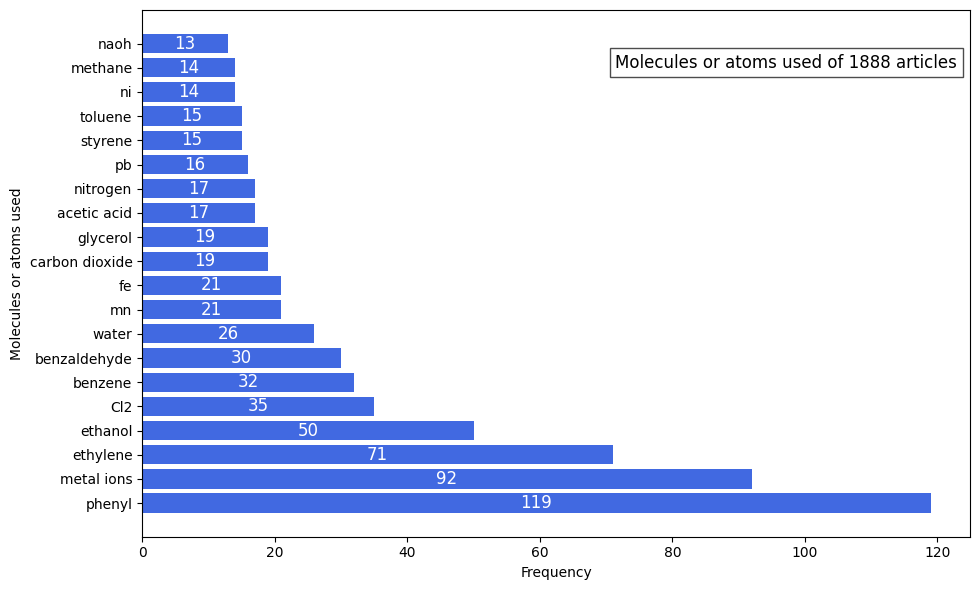

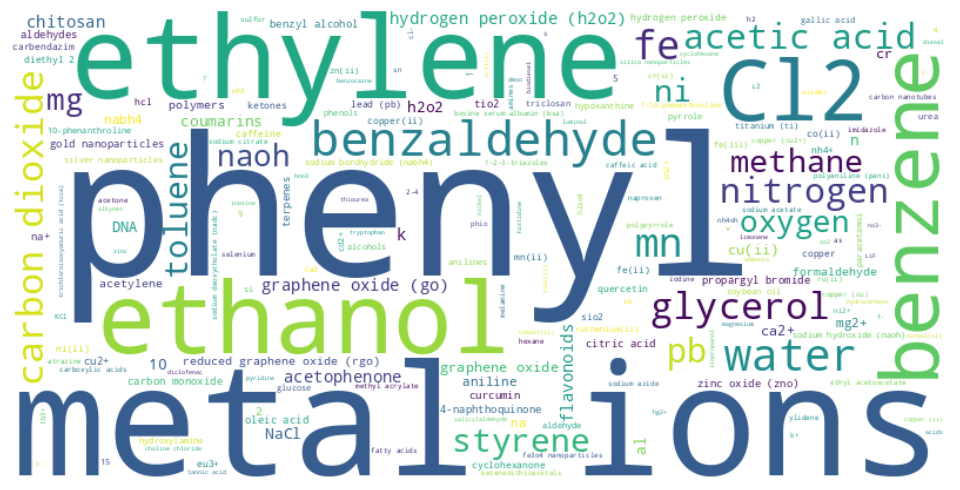

In [17]:
Molecules = data['Molecules or atoms used'].dropna()

all_Molecules = (Molecules.str.split(r'[;,]').explode().str.strip().str.lower().str.replace("'", ""))

all_Molecules = all_Molecules[all_Molecules != ""]
mapped_Molecules = all_Molecules.apply(lambda x: reverse_map_Molecule(x, MoleculesUsed_mapping))
Molecule_counts_geral = Counter(mapped_Molecules)
top_Molecules = Molecule_counts_geral.most_common(20)
#print(top_Molecules)
Molecules, counts = zip(*top_Molecules)

plot_Molecule_bar(top_Molecules, context_label="Molecules or atoms used of 1888 articles")
plot_Molecule_wordcloud(Molecule_counts_geral)

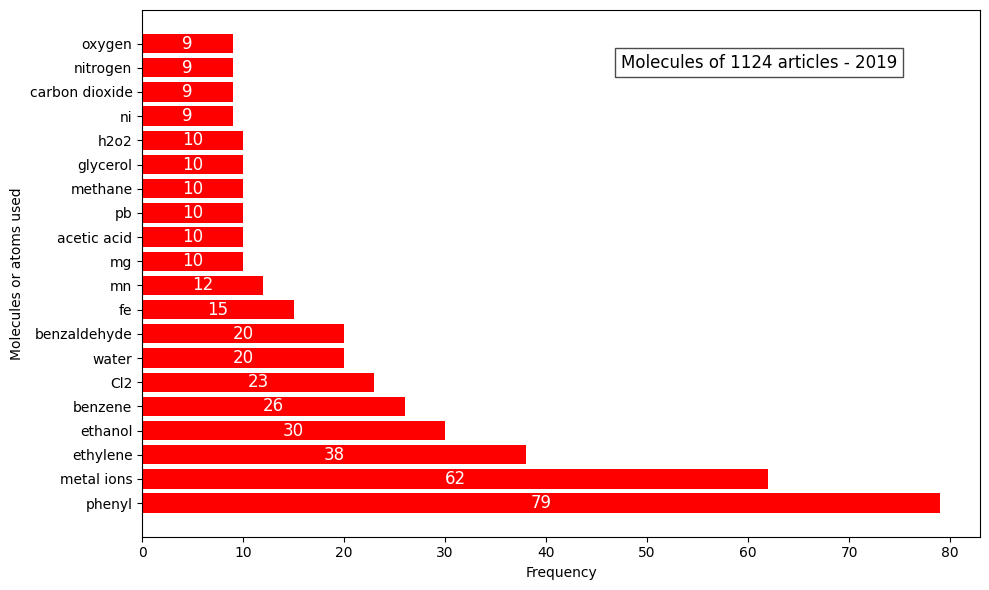

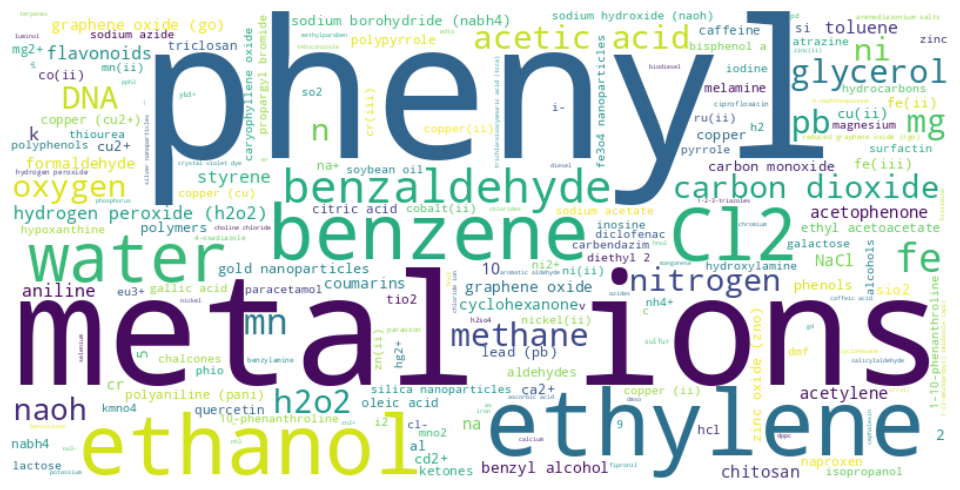

In [ ]:

data_2019 = data[data['Year'] == 2019]

Molecules = data_2019['Molecules or atoms used'].dropna()
all_Molecules = (Molecules.str.split(r'[;,]').explode().str.strip().str.lower().str.replace("'", ""))

all_Molecules = all_Molecules[all_Molecules != ""]

mapped_Molecules = all_Molecules.apply(lambda x: reverse_map_Molecule(x, MoleculesUsed_mapping))
Molecule_counts_2019 = Counter(mapped_Molecules)
top_Molecules = Molecule_counts_2019.most_common(20)
Molecules, counts = zip(*top_Molecules)

plot_Molecule_bar(top_Molecules, context_label="Molecules of 1124 articles - 2019", bar_color="red")
plot_Molecule_wordcloud(Molecule_counts_2019)


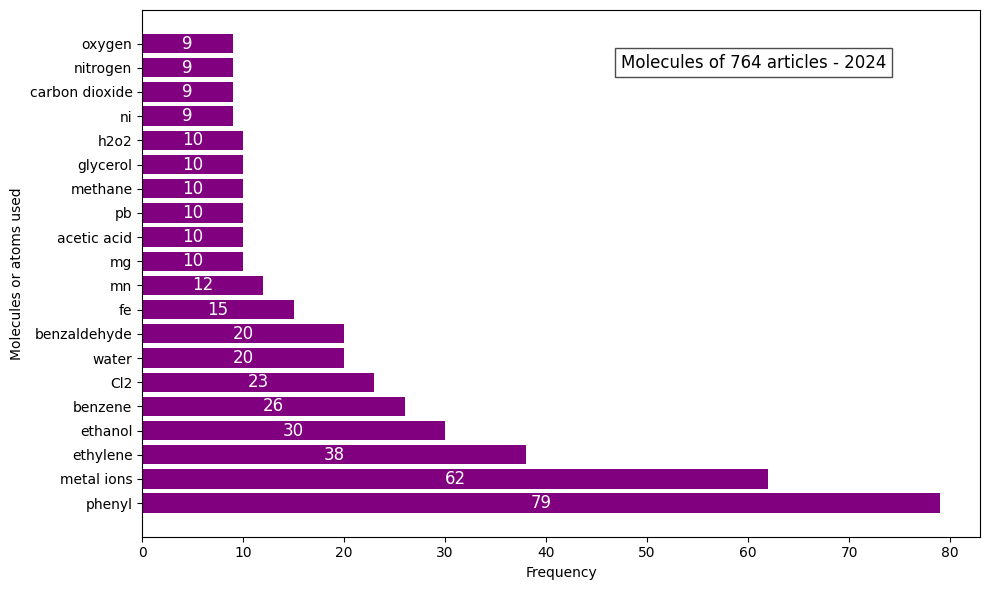

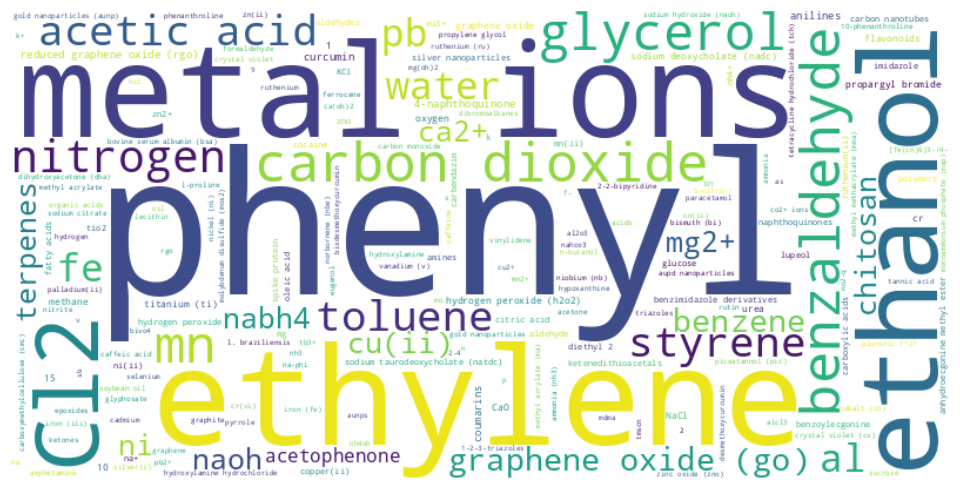

In [ ]:

data_2019 = data[data['Year'] == 2024]


Molecules = data_2019['Molecules or atoms used'].dropna()


all_Molecules = (Molecules.str.split(r'[;,]').explode().str.strip().str.lower().str.replace("'", ""))
all_Molecules = all_Molecules[all_Molecules != ""]

mapped_Molecules = all_Molecules.apply(lambda x: reverse_map_Molecule(x, MoleculesUsed_mapping))
Molecule_counts_2024 = Counter(mapped_Molecules)
top_Molecules = Molecule_counts_2019.most_common(20)
Molecules, counts = zip(*top_Molecules)

plot_Molecule_bar(top_Molecules, context_label="Molecules of 764 articles - 2024", bar_color="purple")
plot_Molecule_wordcloud(Molecule_counts_2024)

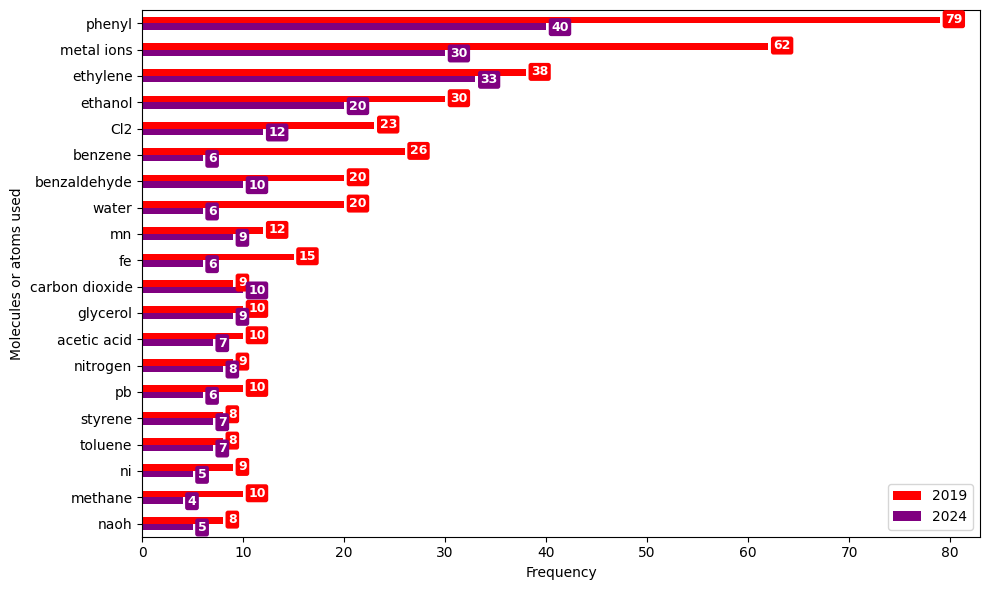

In [ ]:
from collections import Counter


plot_comparison_bar(
    counts_a=Molecule_counts_2019,
    counts_b=Molecule_counts_2024,
    label_a="2019",
    label_b="2024",
    #title="Molecule Frequency Comparison: 2019 vs 2024"
)


In [ ]:
import csv
print(Molecule_counts_2019)
Molecule_counts_2019 = dict(Molecule_counts_2019)
Molecule_counts_2024 = dict(Molecule_counts_2024)

total_2019 = sum(Molecule_counts_2019.values())
total_2024 = sum(Molecule_counts_2024.values())


all_areas = sorted(list(set(Molecule_counts_2019.keys()) | set(Molecule_counts_2024.keys())))

csv_rows = []
csv_rows.append(['Area Code', '2019 Count', '2019 Percentage (%)', '2024 Count', '2024 Percentage (%)', 'Percentage Change (2019 to 2024)'])

for area in all_areas:
    count_2019 = Molecule_counts_2019.get(area, 0)
    count_2024 = Molecule_counts_2024.get(area, 0)

    percentage_2019 = (count_2019 / total_2019 * 100) if total_2019 > 0 else 0
    percentage_2024 = (count_2024 / total_2024 * 100) if total_2024 > 0 else 0

    percentage_change = percentage_2024 - percentage_2019

    csv_rows.append([
        area,
        count_2019,
        f"{percentage_2019:.2f}", 
        count_2024,
        f"{percentage_2024:.2f}", 
        f"{percentage_change:.2f}" 
    ])

output_filename = 'research_molecules_comparison.csv'

with open(output_filename, 'w', newline='', encoding='utf-8') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerows(csv_rows)

print(f"CSV file '{output_filename}' created successfully!")
print(f"Total abstracts in 2019: {total_2019}")
print(f"Total abstracts in 2024: {total_2024}")



Counter({'phenyl': 79, 'metal ions': 62, 'ethylene': 38, 'ethanol': 30, 'benzene': 26, 'Cl2': 23, 'water': 20, 'benzaldehyde': 20, 'fe': 15, 'mn': 12, 'mg': 10, 'acetic acid': 10, 'pb': 10, 'methane': 10, 'glycerol': 10, 'h2o2': 10, 'ni': 9, 'carbon dioxide': 9, 'nitrogen': 9, 'oxygen': 9, 'n': 9, 'DNA': 9, 'naoh': 8, 'hydrogen peroxide (h2o2)': 8, 'flavonoids': 8, 'styrene': 8, 'k': 8, 'aniline': 8, 'toluene': 8, 'NaCl': 7, 'acetophenone': 7, 'na': 7, 'chitosan': 7, 'acetylene': 7, '10': 7, '5': 6, 'cr': 6, 'formaldehyde': 6, 'graphene oxide (go)': 6, '2': 6, 'benzyl alcohol': 6, 'graphene oxide': 6, 'coumarins': 6, 'cyclohexanone': 6, 'gold nanoparticles': 5, 'sodium borohydride (nabh4)': 5, 'copper': 5, 'cd2+': 5, 'cu2+': 5, 'lead (pb)': 5, 'cu(ii)': 5, 'fe(iii)': 5, 'zinc oxide (zno)': 5, 'carbon monoxide': 5, 'ca2+': 5, 'phenols': 5, 'fe(ii)': 5, 'al': 5, 'polymers': 5, 'sio2': 5, 'co(ii)': 4, 'hcl': 4, 'triclosan': 4, 'melamine': 4, 'quercetin': 4, 'ethyl acetoacetate': 4, 'coppe